Test Set Performance:
[[ 233557   58277]
 [    568 1177128]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    291834
           1       0.95      1.00      0.98   1177696

    accuracy                           0.96   1469530
   macro avg       0.98      0.90      0.93   1469530
weighted avg       0.96      0.96      0.96   1469530

ROC AUC: 0.0098
Average Precision: 0.6990


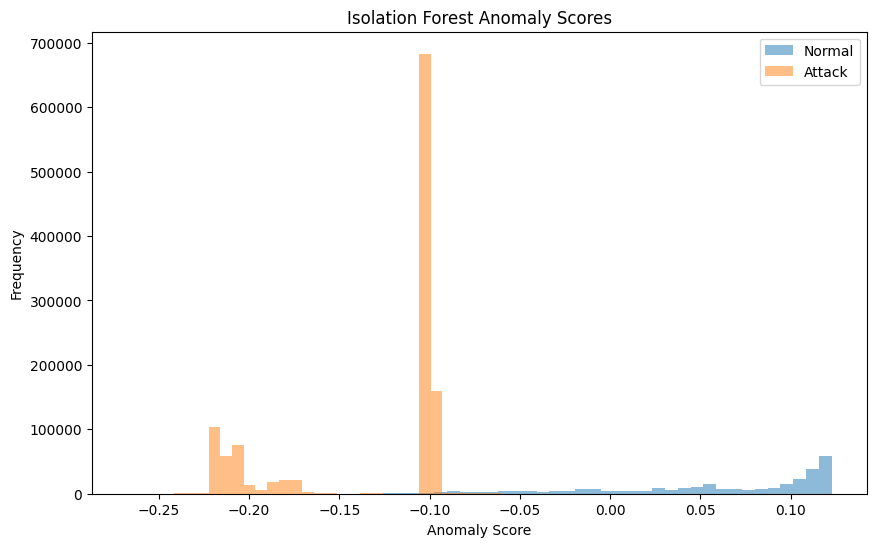

In [ ]:
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import (classification_report, 
                            confusion_matrix,
                            roc_auc_score,
                            average_precision_score)
import joblib
import matplotlib.pyplot as plt

#Load processed data
X_train=np.load('X_train.npy')
y_train=np.load('y_train.npy')
X_test=np.load('X_test.npy')
y_test=np.load('y_test.npy')

#Train only on normal samples
X_train_normal=X_train[y_train == 0]

#Initialize and train model
iso_forest=IsolationForest(
    contamination=0.2,
    n_estimators=300,
    max_samples='auto',
    random_state=42,
    n_jobs=-1
)
iso_forest.fit(X_train_normal)

#Evaluate
test_scores=iso_forest.decision_function(X_test)
y_pred=(test_scores < 0).astype(int)

print("Test Set Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, test_scores):.4f}")
print(f"Average Precision: {average_precision_score(y_test, test_scores):.4f}")

#Save model
joblib.dump(iso_forest, 'isolation_forest.joblib')

#Plot score distribution
plt.figure(figsize=(10,6))
plt.hist(test_scores[y_test==0], bins=50, alpha=0.5, label='Normal')
plt.hist(test_scores[y_test==1], bins=50, alpha=0.5, label='Attack')
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.legend()
plt.title("Isolation Forest Anomaly Scores")
plt.savefig('iso_forest_scores.png')
plt.show()